<a href="https://colab.research.google.com/github/rikanga/Easy-Numpy/blob/main/ModelEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Evaluation and Improvement**

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
!pip install mglearn
import mglearn

     |████████████████████████████████| 540 kB 5.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=3ebe2f1f27201dd2d657fd098aa28ccec006c1be843a556a0196673cabcd6f85
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [4]:
#create a synthetic dataset
X, y = make_blobs(random_state=0)

In [6]:
# split data and labels into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
# intantiate a model on the test set
logreg = LogisticRegression().fit(X_train, y_train)

In [8]:
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


La raison pour laquelle on fait la scission des données en entrainement et test est que nous voulons obtenir un cas de généralisation dans nos modèles.

Mais maintenant, nous nous intéressons à voir comment notre modèle fait l'entrainement des données et comment fait il la prédiction de nouvelles données


Dans ce chapitre on verra bien, deux aspects:

* **cross-validation** qui est un de plus grand moyen d'atteindre les performances de généralisation
* et discuter des methodes pour faire l'évaluation de performance de classification et regression

Mais nous parlerons aussi de **grid search** qui permet de rechercher les meilleurs paramètres pour nos modèles

## **Cross-Validation**

La validation croisée est une méthode statistique d'évaluation des performances de généralisation qui
est plus stable et approfondi que d'utiliser une division en un ensemble d'entraînement et un ensemble de test.

Ici les données sont rapidement divisés et plusieurs modèles sont aussi entrainer

La version de cross-validation la plus utilisée est **k-fold** ou k est nombre définit par l'utilisateur et qui varie notamment de 5 à 10.

- Lorsque l'on choisit k égale à 5, les données sont divisées en 5 parties égales appelées **folds(plis)**

**Illustration**

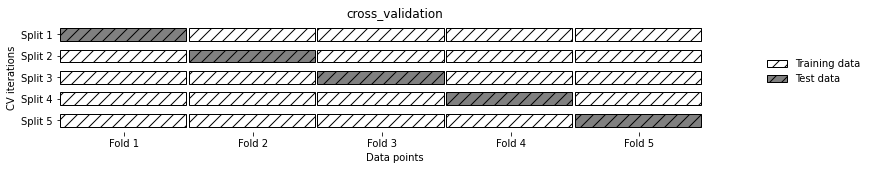

In [9]:
mglearn.plots.plot_cross_validation()

### **Cross validation inf sklearn**

On retrouve  **cross_val_score** dans le module **model_selection** de sklearn

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [12]:
iris = load_iris()

In [16]:
logreg = LogisticRegression(max_iter=10000)

NB: Par défaut, **cross_val_score** à 3 plis(**folds**) et donne l'algorithme renvoie trois valeurs de précision

- On peut ajuster le nombre de plis(**folds**) grâce au paramètre **cv** de **cross_val_score**

In [20]:
cross_val_score(logreg, iris.data, iris.target, cv=3)

array([0.98, 0.96, 0.98])

In [21]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)

In [22]:
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


Pour évaluer la précision de la validation croisée, on calcule la moyenne de scores

In [23]:
print("Average corss-validation {:.2f}".format(scores.mean()))

Average corss-validation 0.97


**Inconvénient de la cross validation**

Et qu'elle coute en terme de temps pour la formation de chaque plis

### **Stratified k-Fold Cross-Validation and Other Strategies**


En validation croisée stratifiée, nous
diviser les données de telle sorte que les proportions entre les classes soient les mêmes dans chaque pli comme
ils sont dans l'ensemble de données,

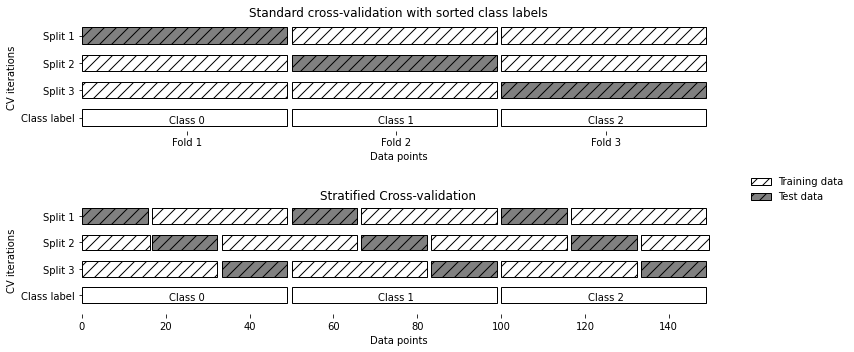

In [24]:
mglearn.plots.plot_stratified_cross_validation()

#### **More control over cross validation**

In [25]:
from sklearn.model_selection import KFold

In [26]:
kfold = KFold(n_splits=5)

In [29]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)

In [31]:
print("Cross validation score {}".format(scores))

Cross validation score [1.         1.         0.86666667 0.93333333 0.83333333]


In [32]:
scores.mean()

0.9266666666666665

In [33]:
kfold = KFold(n_splits=3)

In [36]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0., 0., 0.])

In [37]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

In [38]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0.98, 0.96, 0.96])